<a href="https://colab.research.google.com/github/julius-kazibwe/Group_E_Fingerprint_ML_Project/blob/master/Group_E_Fingerprint_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import os
import cv2

import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')



In [ ]:
import zipfile

# Define the path of the ZIP file in your Google Drive
zip_file_path = '/content/drive/My Drive/Colab Notebooks/fingerprint_datasets.zip'

# Define the folder where you want to extract the dataset
extracted_folder_path = '/content/dataset/'

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print('Dataset extracted successfully!')


Dataset extracted successfully!


In [ ]:
# List all files in the dataset folder
file_list = os.listdir(extracted_folder_path)
print(file_list)


['fingerprint_datasets']


In [ ]:
# Define the path to the 'fingerprint_datasets' folder in your Colab environment
dataset_folder_path = '/content/dataset/fingerprint_datasets/'

# List all files in the 'fingerprint_datasets' folder
file_list = os.listdir(dataset_folder_path)

# Print the list of files
print(file_list)


['Altered', 'Real']


In [ ]:
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')

    if train:
      gender, lr, finger, _, _ = etc.split('_')
    else:
      gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1

    if finger == 'thumb':
      finger = 0
    elif finger == 'index':
      finger = 1
    elif finger == 'middle':
      finger = 2
    elif finger == 'ring':
      finger = 3
    elif finger == 'little':
      finger = 4
    return np.array([gender], dtype=np.uint16)

In [ ]:
img_size = 96


def loading_data(path,boolean):
    data = []
    for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),boolean)

            data.append([label[0], img_resize ])
            if len(data) % 1000 == 0:
                print(len(data))
    return data

In [ ]:
Easy_path = os.path.join(dataset_folder_path, 'Altered', 'Altered-Easy')
Medium_path = os.path.join(dataset_folder_path, 'Altered', 'Altered-Medium')
Hard_path = os.path.join(dataset_folder_path, 'Altered', 'Altered-Hard')
Real_path = os.path.join(dataset_folder_path, 'Real')

Easy_images= loading_data(Easy_path, True)

directories = [Real_path, Easy_path, Medium_path, Hard_path]


In [ ]:
img, labels = [], []
for label, feature in Easy_images:
    labels.append(label)
    img.append(feature)

In [ ]:
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
train_data = train_data / 255.0


In [ ]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(labels, num_classes = 2)

In [ ]:
labels = np.array(labels)

In [ ]:
plt.imshow(train_data[40])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [96, 96, 1]),
MaxPooling2D(2),
Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
MaxPooling2D(2),
Flatten(),
Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
Dense(1, activation = 'sigmoid'),
])
model.summary()


model.compile(optimizer = optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
history = model.fit(train_data, labels, batch_size = 128, epochs = 24,
          validation_split = 0.2, callbacks = [early_stopping_cb], verbose = 1)

Epoch 1/24
113/113 [==============================] - 208s 2s/step - loss: 0.7833 - accuracy: 0.7750 - val_loss: 0.4976 - val_accuracy: 0.7931
Epoch 2/24
113/113 [==============================] - 206s 2s/step - loss: 0.4473 - accuracy: 0.8016 - val_loss: 0.4742 - val_accuracy: 0.7959
Epoch 3/24
113/113 [==============================] - 200s 2s/step - loss: 0.4082 - accuracy: 0.8235 - val_loss: 0.4138 - val_accuracy: 0.8193
Epoch 4/24
113/113 [==============================] - 194s 2s/step - loss: 0.3502 - accuracy: 0.8518 - val_loss: 0.4389 - val_accuracy: 0.8023
Epoch 5/24
113/113 [==============================] - 205s 2s/step - loss: 0.3058 - accuracy: 0.8740 - val_loss: 0.3350 - val_accuracy: 0.8500
Epoch 6/24
113/113 [==============================] - 213s 2s/step - loss: 0.2375 - accuracy: 0.9063 - val_loss: 0.4197 - val_accuracy: 0.8283
Epoch 7/24
113/113 [==============================] - 208s 2s/step - loss: 0.2012 - accuracy: 0.9212 - val_loss: 0.2664 - val_accuracy: 0.8927

In [ ]:
test_data = loading_data(Real_path,False)

x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)

1000
2000
3000
4000
5000
6000


In [ ]:
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
type(y_test)

numpy.ndarray

In [ ]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 23s 121ms/step - loss: 8.2061 - accuracy: 0.9918


[8.20605754852295, 0.9918333292007446]

188/188 [==============================] - 30s 158ms/step
6000


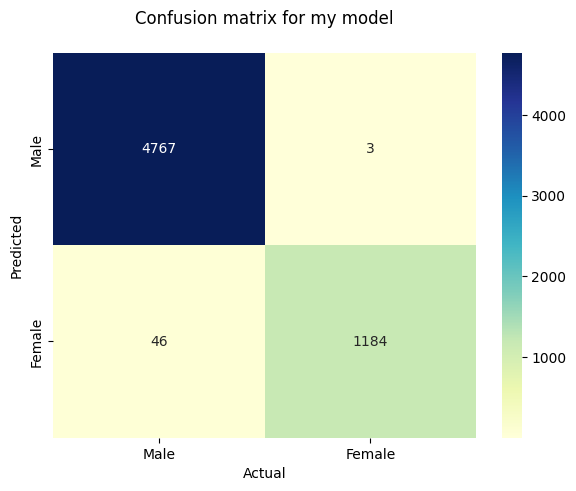

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Male', 'Female'], columns=['Male', 'Female'])
plt.subplot(121)
plt.title("Confusion matrix for my model\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

print(len(y_test==1))

In [ ]:
model.save('GROUP_E_MODEL.h5')

In [ ]:
for i in range(5):
    print('True: ',y_test[i])
    print('predicted: ',model.predict(np.expand_dims(x_test[i],0))[0])
    print()
    plt.imshow(x_test[i])
    plt.show()